<a href="https://colab.research.google.com/github/WholeNunes/Rascunhos/blob/main/Regress%C3%A3o%20Treino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão Treino

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('car_data.csv')

In [4]:
print(df.shape)

(301, 9)


Para seguir com a criação da regressão, é preciso substituir os dados de textos por números.
Gasolina, Diesel ou GasNatural (0, 1, 2) //
Revendedor, Individual(0, 1) // 
Manual, Automatico(0, 1).


In [20]:
df['tipo_transmissao'].replace({'Manual': 0, 'Automatico': 1}, inplace=True)
df['tipo_vendedor'].replace({'Revendedor': 0, 'Individual': 1}, inplace=True)
df['tipo_combustivel'].replace({'Gasolina': 0, 'Diesel': 1, 'GasNatural': 2}, inplace=True)
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Criando grafico para visualização das variaveis 

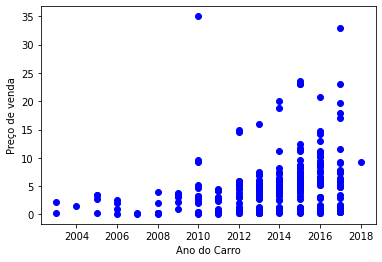

In [21]:
plt.scatter(df['ano'], df['preco_venda'],  color='blue')
plt.xlabel("Ano do Carro")
plt.ylabel("Preço de venda")
plt.show()

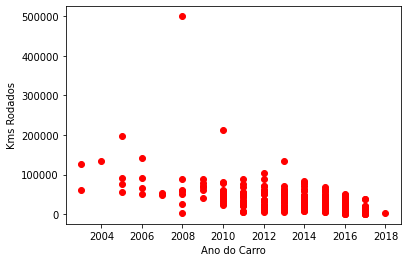

In [22]:
plt.scatter(df['ano'], df['kms_rodados'],  color='red')
plt.xlabel("Ano do Carro")
plt.ylabel("Kms Rodados")
plt.show()

Separando variaveis dependentes e idenpendente 

In [37]:
#x -> dependente
#y -> independente
x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel', 'tipo_vendedor', 'tipo_transmissao', 'n_donos']]
y = df[['preco_venda']]

Usarei para criação do modelo 80% dos dados para treino e 20% para teste.

In [38]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2)

**x_treino** é a parte usada para treinar o algoritmo

**x_teste** é a parte usada para testar o algoritmo depois de treinado

**y_treino** é a parte das respostas usadas no treino

**y_teste** é a parte das respostas usadas para testar o algoritmo

In [39]:
print('Treino')
print("x_train: ",x_treino.shape)
print("y_train: ",y_treino.shape)

print('\nTeste')
print("x_test: ",x_teste.shape)
print("y_test: ",y_teste.shape)

Treino
x_train:  (240, 7)
y_train:  (240, 1)

Teste
x_test:  (61, 7)
y_test:  (61, 1)


Treinando o modelo

In [40]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

modelo.fit(x_treino, y_treino)


LinearRegression()

In [43]:
#Previsão dos preços --> y_prev
y_prev = modelo.predict(x_teste)

In [44]:
print(y_prev.shape)
print(y_teste.shape)


(61, 1)
(61, 1)


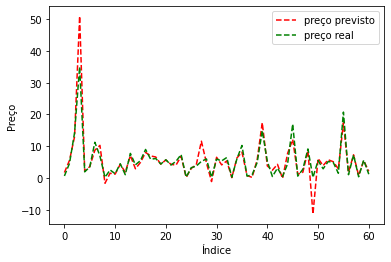

In [45]:
plt.plot(range(y_prev.shape[0]), y_prev,'r--')
plt.plot(range(y_teste.shape[0]), y_teste,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')
plt.show()

Agora para saber o percentual de acertos do projeto

In [46]:
from sklearn.metrics import r2_score

print('R2-score: ', r2_score(y_teste, y_prev))

R2-score:  0.7254296930986064


Taxa de uma possível previsão correta é de 72,54%.

#Regressão - Prática solo

In [47]:
new_x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]
new_y = df[['preco_venda']]

x_tr, x_te, y_tr, y_te = train_test_split(new_x, new_y, test_size=0.2)

Criado os novos dados para a nova previsão
x_tr = x_treino
x_te = x_teste
y_tr = x_treino
y_te = y_teste

In [50]:
pro = LinearRegression()
pro.fit(x_tr, y_tr)

y_previsao = pro.predict(x_te)

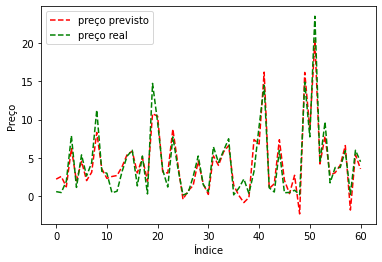

In [51]:
plt.plot(range(y_previsao.shape[0]), y_previsao,'r--')
plt.plot(range(y_te.shape[0]), y_te,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')
plt.show()

In [52]:
#Para saber a nova porcentagem do modelo:
print('R2-score: ', r2_score(y_te, y_previsao))

R2-score:  0.8850092753765711


**A porcentagem é maior do que o modelo anterior, cerca de 88,5%**